# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

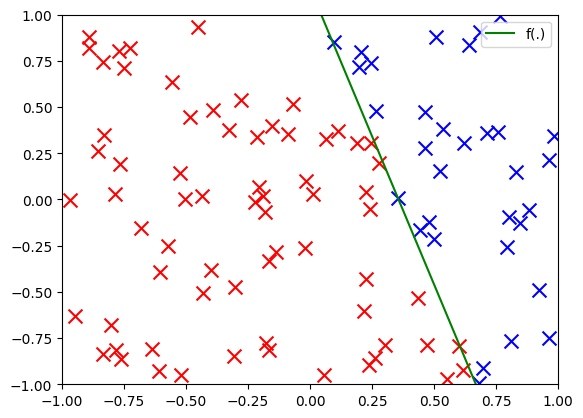

In [50]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [ ]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000, epsilon=1e-6):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs
      self.epsilon = epsilon

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        X = np.array(_X)              
        y = np.array(_y).reshape(-1)  

        N, d = X.shape
        self.w = np.zeros(d)         

        for t in range(self.tmax):
            # Vetor gradiente g_t
            margins = y * (X @ self.w)
            probs = 1 / (1 + np.exp(margins))  # shape: (N,)
            gt = - (1 / N) * np.sum((y[:, np.newaxis] * X) * probs[:, np.newaxis], axis=0)

            # Critério de parada
            if LA.norm(gt) < self.epsilon:
                break

            # Atualização de w
            self.w = self.w - self.eta * gt

    def predict_prob(self, X):
        X = np.array(X)
        return 1 / (1 + np.exp(-X @ self.w))

    def predict(self, X):
        prob = self.predict_prob(X)
        return np.where(prob >= 0.5, 1, -1)  # Consistente com y ∈ {-1, 1}

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


[6.08873755e-01 3.47960603e-01 1.31770246e-03 6.54648913e-02
 2.50047203e-01 3.07630340e-01 7.03055358e-04 7.66322055e-01
 3.13027448e-01 7.29069006e-03 1.50395275e-01 9.71544142e-01
 9.27510884e-01 2.03360435e-03 6.62571051e-02 4.88718651e-02
 8.55833069e-01 1.13575757e-01 4.41146048e-01 5.92726459e-03
 1.99517464e-02 8.69169030e-02 5.17286363e-04 9.82544746e-01
 1.11205535e-02 1.52052766e-02 7.06759659e-01 5.05287347e-01
 9.24811822e-01 3.83462286e-02 5.08399298e-01 8.93839795e-01
 1.49105115e-03 1.06840918e-02 1.93872657e-01 8.79744761e-01
 1.48667931e-01 9.30802255e-01 9.30511801e-03 1.06741135e-01
 5.94679776e-01 5.13563621e-03 3.47159828e-02 4.00468789e-01
 3.63468305e-02 7.06197195e-04 6.95845174e-01 8.27260210e-04
 4.33408150e-04 1.65217067e-02 2.92636384e-01 9.56754688e-01
 1.58268282e-02 1.59067708e-02 5.27293047e-03 3.71799709e-01
 5.77153303e-02 7.54729358e-01 5.21557700e-01 1.81494246e-01
 4.52118705e-01 5.81301262e-02 1.02608402e-01 1.04146672e-02
 8.17519656e-01 3.466971

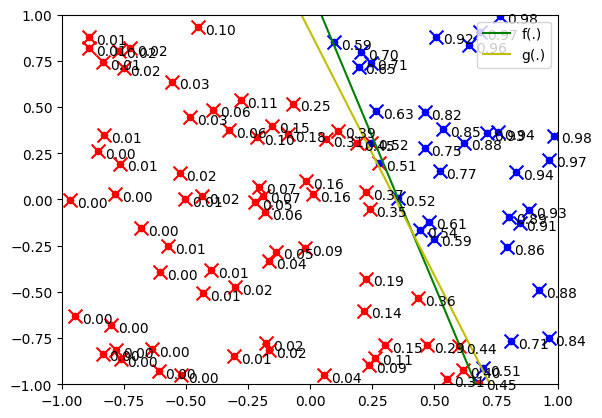

In [54]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")


**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

In [ ]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

Error in : 3.0%


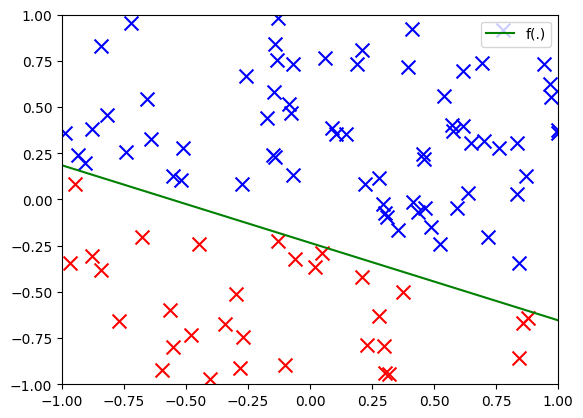

In [14]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
#print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
#print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")
